### === Task ===

1. With the iris data given in class, implement train_test_split from scratch.

2. Put everything into a class called LogisticRegression, this class should allow you choose any of the training methods you'd like including "batch", "minibatch" and "sto". However, if the input method is not one of the three, it should "raise ValueError".

3. Calculate time taken to fit your models using different training methods.

4. Perform a classification on the dataset using all 3 methods and also show what happens if your defined training method is not either "batch", "minibatch" or "sto". Make sure to plot the training losses.

5. Simply, use classification_report from sklearn.metrics to evaluate your models.

6. Discuss your results ie. training losses of the three methods and time taken to fit models.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.preprocessing import StandardScaler
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report
import time

#Step 1: Prepare data

# import some data to play with
iris = datasets.load_iris()
X = iris.data[:, 2:]  # we only take the first two features.
y = iris.target  #now our y is three classes thus require multinomial

# feature scaling helps improve reach convergence faster
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [2]:
# Split data into training and test datasets
idx = np.arange(0,len(X),1)
np.random.shuffle(idx)
idx_train = idx[0:int(.7*len(X))]
idx_test = idx[len(idx_train):len(idx)]

X_train = X[idx_train]
X_test = X[idx_test]
y_train = y[idx_train]
y_test = y[idx_test]

In [3]:
# add intercept to our X
intercept = np.ones((X_train.shape[0], 1))
X_train   = np.concatenate((intercept, X_train), axis=1)  #add intercept
intercept = np.ones((X_test.shape[0], 1))
X_test    = np.concatenate((intercept, X_test), axis=1)  #add intercept

# make sure our y is in the shape of (m, k)
# we will convert our output vector in 
# matrix where no. of columns is equal to the no. of classes. 
# The values in the matrix will be 0 or 1. For instance the rows 
# where we have output 2 the column 2 will contain 1 and the rest are all 0.
# in simple words, y will be of shape (m, k)
k = len(set(y))  # no. of class  (can also use np.unique)
m = X_train.shape[0]  # no.of samples
n = X_train.shape[1]  # no. of features
y_train_encoded = np.zeros((m, k))
for each_class in range(k):
    cond = y_train==each_class
    y_train_encoded[np.where(cond), each_class] = 1

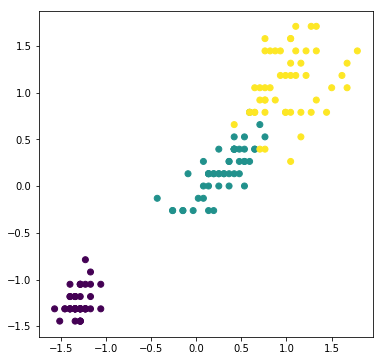

In [4]:
# Step 1.1 (optional): Visualize our data

# your code here
plt.figure(figsize=(6,6))
plt.scatter(X[:, 0], X[:, 1], label='class 0', c=y)
plt.show()

In [5]:
# Step 2: Fit your data


class LogisticRegression:
    
    def __init__(self, k, n, method, alpha = 0.001, max_iter=10000):
        self.k = k
        self.n = n
        self.alpha = alpha
        self.max_iter = max_iter
        self.method = method
    
    def fit(self, X, y):
        self.w = np.random.rand(self.n, self.k)
        self.losses = []
        
        if self.method == "batch":
            start_time = time.time()
            for i in range(self.max_iter):
                loss, grad =  self.gradient(X, y)
                self.losses.append(loss)
                self.w = self.w - self.alpha * grad
                if i % 500 == 0:
                    print(f"Loss at iteration {i}", loss)
            print(f"time taken: {time.time() - start_time}")
            
        elif self.method == "minibatch":
            start_time = time.time()
            batch_size = int(0.3 * X.shape[0])
            for i in range(self.max_iter):
                ix = np.random.randint(0, X.shape[0]) #<----with replacement
                batch_X = X[ix:ix+batch_size]
                batch_y = y[ix:ix+batch_size]
                loss, grad = self.gradient(batch_X, batch_y)
                self.losses.append(loss)
                self.w = self.w - self.alpha * grad
                if i % 500 == 0:
                    print(f"Loss at iteration {i}", loss)
            print(f"time taken: {time.time() - start_time}")
            
        elif self.method == "sto":
            start_time = time.time()
            for i in range(self.max_iter):
                list_of_used_ix = []
                idx = np.random.randint(X.shape[0])
                while i in list_of_used_ix:
                    idx = np.random.randint(X.shape[0])
                X_train = X[idx, :].reshape(1, -1)
                y_train = y[idx]
                loss, grad = self.gradient(X_train, y_train)
                self.losses.append(loss)
                self.w = self.w - self.alpha * grad
                
                list_of_used_ix.append(i)
                if len(list_of_used_ix) == X.shape[0]:
                    list_of_used_ix = []
                if i % 500 == 0:
                    print(f"Loss at iteration {i}", loss)
            print(f"time taken: {time.time() - start_time}")
            
        else:
            raise ValueError('Method must be one of the followings: "batch", "minibatch" or "sto".')
        
        
    def gradient(self, X, y):
        m = X.shape[0]
        h = self.h_theta(X, self.w)
        loss = - np.sum(y*np.log(h)) / m
        error = h - y
        grad = self.softmax_grad(X, error)
        return loss, grad

    def softmax(self, x):
        return np.exp(x) / np.sum(np.exp(x), axis=1, keepdims=True)

    def softmax_grad(self, X, error):
        return  X.T @ error

    def h_theta(self, X, w):
        '''
        Input:
            X shape: (m, n)
            w shape: (n, k)
        Returns:
            yhat shape: (m, k)
        '''
        return self.softmax(X @ w)
    
    def predict(self, X_test):
        return np.argmax(self.h_theta(X_test, self.w), axis=1)
    
    def plot(self):
        plt.plot(np.arange(len(self.losses)) , self.losses, label = "Train Losses")
        plt.title("Losses")
        plt.xlabel("epoch")
        plt.ylabel("losses")
        plt.legend()

Loss at iteration 0 1.2753116786051377
Loss at iteration 500 0.16544369388977592
Loss at iteration 1000 0.11929647437216002
Loss at iteration 1500 0.10071782585242099
Loss at iteration 2000 0.09032617445104747
Loss at iteration 2500 0.08355747439013364
Loss at iteration 3000 0.0787450591614158
Loss at iteration 3500 0.07512433297548068
Loss at iteration 4000 0.07229064999289077
Loss at iteration 4500 0.070007679316282
Loss at iteration 5000 0.06812706722528418
Loss at iteration 5500 0.06655041981475841
Loss at iteration 6000 0.06520959524077699
Loss at iteration 6500 0.06405573182042267
Loss at iteration 7000 0.06305277835861446
Loss at iteration 7500 0.062173494572871336
Loss at iteration 8000 0.061396878804231704
Loss at iteration 8500 0.06070645726711229
Loss at iteration 9000 0.060089113100091136
Loss at iteration 9500 0.05953426469422581
time taken: 0.6762804985046387
=========Classification report=======
Report:               precision    recall  f1-score   support

          0  

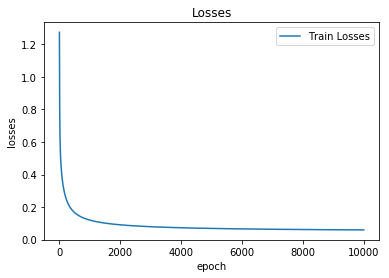

In [6]:
model = LogisticRegression(k, X_train.shape[1], "batch")
model.fit(X_train, y_train_encoded)
yhat = model.predict(X_test)
model.plot()
print("=========Classification report=======")
print("Report: ", classification_report(y_test, yhat))

Loss at iteration 0 1.4788468046993106
Loss at iteration 500 0.328742780439041
Loss at iteration 1000 0.1936350715484816
Loss at iteration 1500 0.1988611115881989
Loss at iteration 2000 0.20871189015948932
Loss at iteration 2500 0.13577611809473739
Loss at iteration 3000 0.12324036664894938
Loss at iteration 3500 0.16318899185596486
Loss at iteration 4000 0.12385645404630886
Loss at iteration 4500 0.0762994077358349
Loss at iteration 5000 0.07948929852849973
Loss at iteration 5500 0.14949368122550827
Loss at iteration 6000 0.07039841338410466
Loss at iteration 6500 0.05698255271109052
Loss at iteration 7000 0.12985687431076678
Loss at iteration 7500 0.05423555069379244
Loss at iteration 8000 0.0848354751387576
Loss at iteration 8500 0.12816998281698094
Loss at iteration 9000 0.0731816668140738
Loss at iteration 9500 0.11105442286278452
time taken: 0.6057226657867432
=========Classification report=======
Report:               precision    recall  f1-score   support

          0       1.

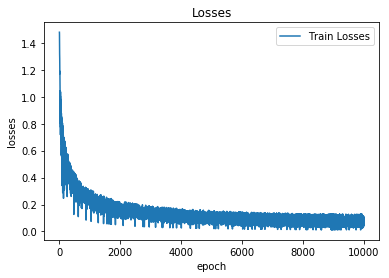

In [7]:
model = LogisticRegression(k, X_train.shape[1], "minibatch")
model.fit(X_train, y_train_encoded)
yhat = model.predict(X_test)
model.plot()
print("=========Classification report=======")
print("Report: ", classification_report(y_test, yhat))

Loss at iteration 0 1.6388771970367628
Loss at iteration 500 1.4265811173765341
Loss at iteration 1000 0.4881969226427687
Loss at iteration 1500 0.4546541428579228
Loss at iteration 2000 0.2579841899532877
Loss at iteration 2500 0.2712274433364304
Loss at iteration 3000 0.21606797726669297
Loss at iteration 3500 1.0984662065967117
Loss at iteration 4000 0.26241078956229974
Loss at iteration 4500 0.16032939783381503
Loss at iteration 5000 0.17016165878163206
Loss at iteration 5500 0.14538760331814896
Loss at iteration 6000 0.1939395584503885
Loss at iteration 6500 0.38791943871288737
Loss at iteration 7000 0.3642800441712504
Loss at iteration 7500 0.10843676353571155
Loss at iteration 8000 0.20012525327306013
Loss at iteration 8500 0.3469264474445708
Loss at iteration 9000 0.29342103946335935
Loss at iteration 9500 0.12518552728752097
time taken: 0.5410106182098389
=========Classification report=======
Report:               precision    recall  f1-score   support

          0       1.00

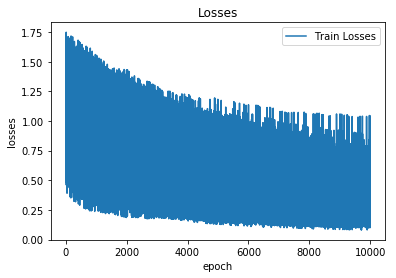

In [8]:
model = LogisticRegression(k, X_train.shape[1], "sto")
model.fit(X_train, y_train_encoded)
yhat = model.predict(X_test)
model.plot()
print("=========Classification report=======")
print("Report: ", classification_report(y_test, yhat))

In [9]:
model = LogisticRegression(k, X_train.shape[1], "Chaky is so handsome")
model.fit(X_train, y_train_encoded)
yhat = model.predict(X_test)
model.plot()

ValueError: Method must be one of the followings: "batch", "minibatch" or "sto".